In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [5]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## What stands out from the describe?
### There is a max lead time of 737 days!  Do hotels even allow that?  Is that a good data point?
### Someone stayed 19 weekend nights.  Did this person/family stay stay for 10-11 weeks?  Looking at stays_in_week_nights, this seems plausible as a 50 weekday stretch would be 10 weeks.
### 55 adults in a single room? 10 children?  10 babies?
### \\$5,400 for an average daily rate?
### 8 Parking spots?

### Someone averaged -\\$6.38/night?

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [33]:
numeric_cols = list(df.select_dtypes(include=['float64', 'int64']))
nunique_counts = pd.DataFrame(columns=['col_name', 'nunique_count'])
for col in numeric_cols:
    nunique_counts = nunique_counts.append({'col_name': str(col), 'nunique_count': df[col].nunique()} ,ignore_index=True)
nunique_counts.sort_values(by=['nunique_count'], ascending=False)

,col_name,nunique_count
17,adr,8879
1,lead_time,479
15,company,352
14,agent,333
16,days_in_waiting_list,128
12,previous_bookings_not_canceled,73
3,arrival_date_week_number,53
6,stays_in_week_nights,35
4,arrival_date_day_of_month,31
13,booking_changes,21


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


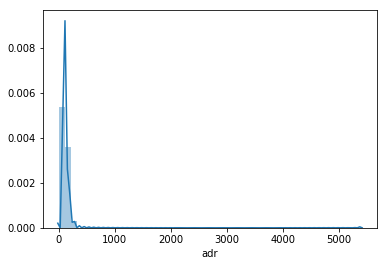

In [35]:
ax = sns.distplot(df.adr)

## A quick glance of ADR shows that most people were paying less than \\$500/night.  This column is skewed right because of some fancy villas maybe.  If these are taken out, there might be more of an even distribution.

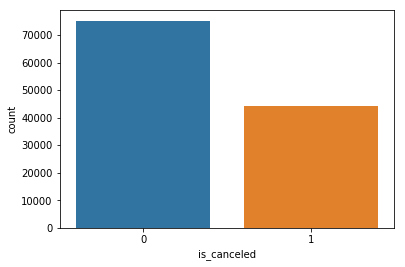

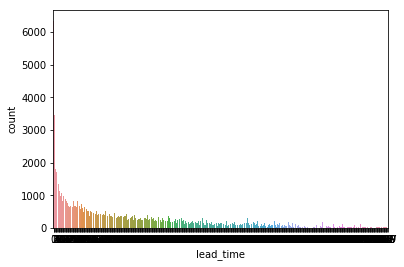

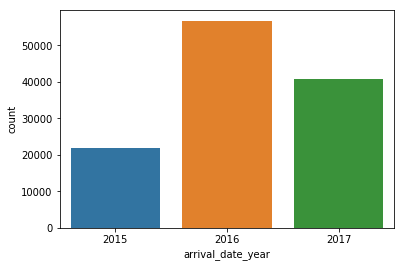

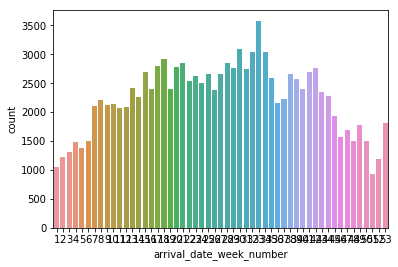

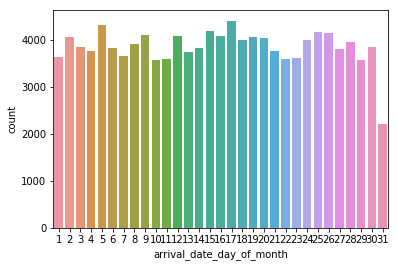

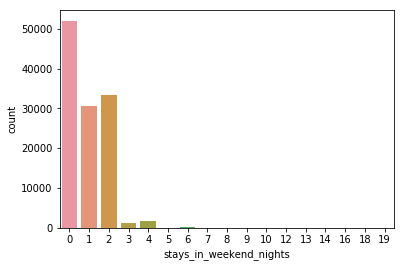

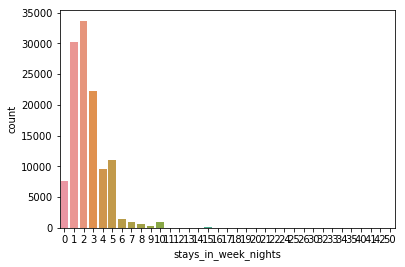

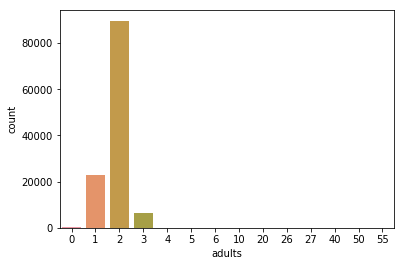

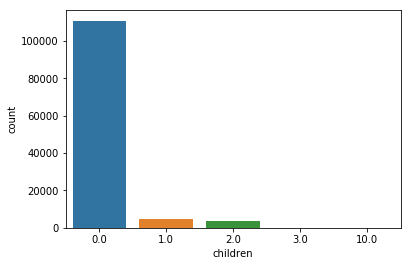

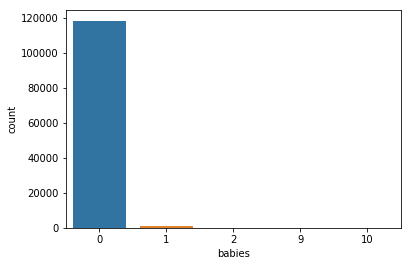

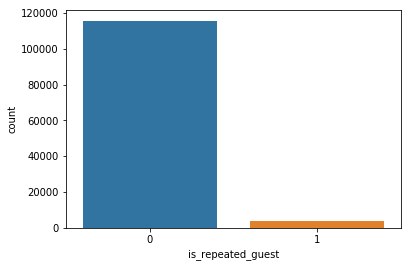

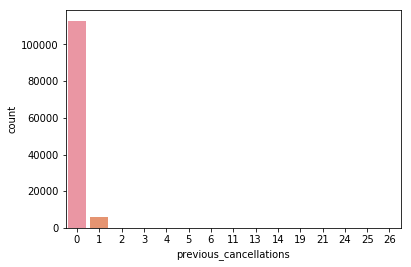

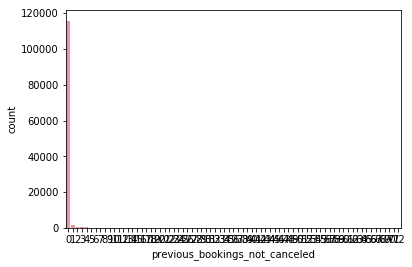

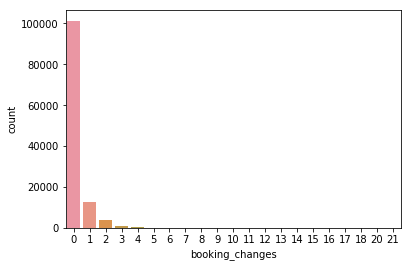

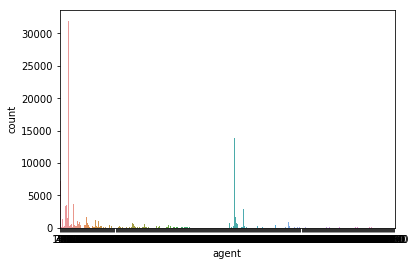

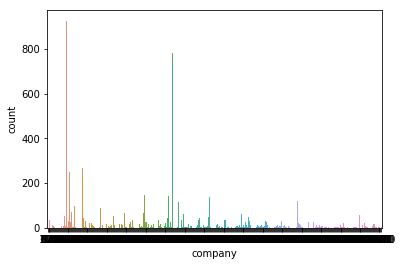

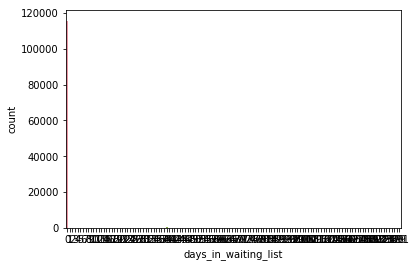

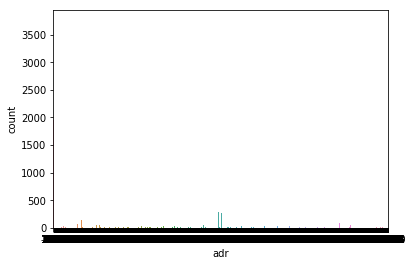

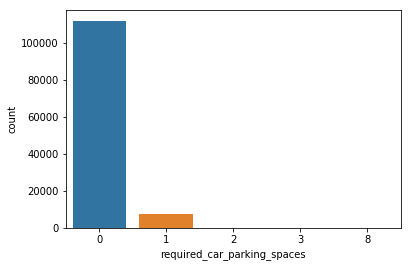

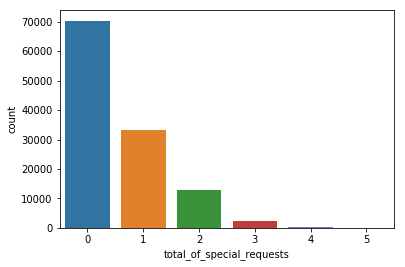

In [46]:
df1 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

## There's a lot to look at here:
### I'm a little surprised at the ratio of not canceled to canceled.
### Arrival date week and arrive date year pair together.  At first glance of the week chart, I'd say there are a lot more booking in summer months.  After looking at the year distribution, I wonder if 2015 didn't start until Fall and 2017 records ended in Fall, which could drive up the values for weeks in warmer months.